# Global Port Spillover Estimator

## Data

This analysis uses data from the [IMF Portwatch Portal](https://portwatch.imf.org/):

- Spillover similulator-generated data for at-risk capacity (metric tons) dataset:[Portwatch Spillover At-Risk Capacity Simulator Data](https://portwatch-imf-dataviz.hub.arcgis.com/datasets/568ee4b957b84481b2af1592f9ad22dd/about). 
- Spillover simulator-generated data for at-risk-value (USD) dataset: [Portwatch Spillover At-Risk Value Simulator Data](https://portwatch.imf.org/datasets/4257aafcbff6453688ee72be7207bd37/about)

The Portwatch data draw upon a port-level geospatial layer describes the network of port-to-port connections given vessels movements between two respective ports. The network is based on a satellite-derived dataset of vessel movements of around 10,000 vessels between 2019 and 2020, from which a port-to-port transport network was constructed.

The spillover simulator estimates the amount of maritime capacity being at-risk of facing delays or disruptions due to port disruptions that affect outgoing vessel movements. These estimates are based on data as of *November 12, 2023*. The model assumes a linear relationship between the number of days of disruption and the impacts, measured in terms of lost metric tons (capacity) or USD (value)

Reference paper: [Verschuur, J., Koks, E.E. & Hall, J.W. Systemic risks from climate-related disruptions at ports. Nat. Clim. Chang. 13, 804–806 (2023).](https://doi.org/10.1038/s41558-023-01754-w)

## Methodology

### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Part I: Estimating At-Risk Capacity of a Port Disruption (Metric Tons) by Country

#### Read in Downladed Dataset and Select Country of Interest

In [3]:
# Read the data from the downloaded file into a DataFrame
df = pd.read_csv('data/2023-11-12-spill-data.csv')

# Filter data to only select rows where "to_country" = "Yemen" (for example)
df_filtered = df[df['to_country'] == 'Yemen']

#### Filter Data for Top Ten Impacted Countries (Summation of All Port Data for Each Country)

In [4]:
# Identify the top ten "from_country" with greatest "daily_capacity_at_risk"
top_ten_countries = df_filtered.groupby('from_country')['daily_capacity_at_risk'].sum().nlargest(10)

# Create a new table with 90-day indicator (using standard numbers in lieu of scientific notation)
new_table = top_ten_countries.reset_index()
new_table['daily_capacity_at_risk_90_days_disruption'] = (new_table['daily_capacity_at_risk'] * 90).apply(lambda x: '{:.0f}'.format(x))

#### Generate Bar Chart
##### Aggregated by Country, Export Capacity at Risk during a 90-Day Disruption of Any Port in a Selected Country (Metric Tons)

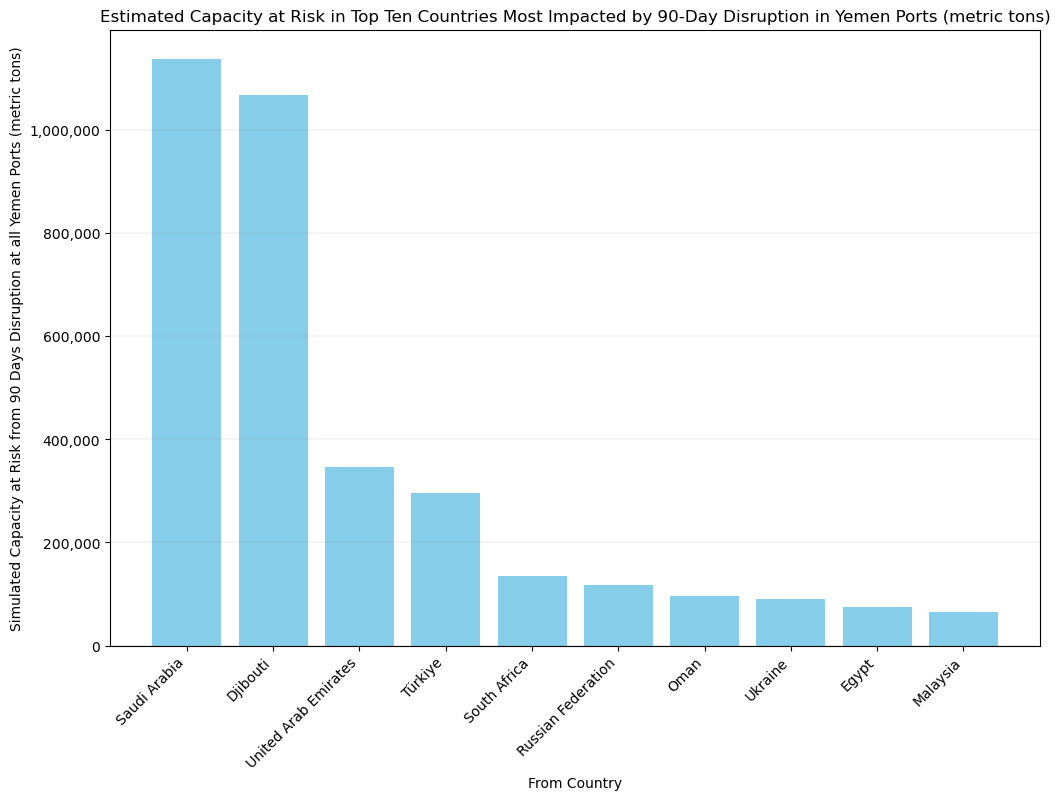

,from_country,daily_capacity_at_risk,daily_capacity_at_risk_90_days_disruption
0,Saudi Arabia,12643.487558,1137914
1,Djibouti,11860.796300,1067472
2,United Arab Emirates,3855.990247,347039
3,Türkiye,3282.348785,295411
4,South Africa,1509.575073,135862
5,Russian Federation,1303.949299,117355
6,Oman,1076.202858,96858
7,Ukraine,998.247991,89842
8,Egypt,837.215334,75349
9,Malaysia,730.501202,65745


In [5]:
# Sort 'daily_capacity_at_risk_90_days_disruption' in descending order
sorted_table = new_table.copy()
sorted_table['daily_capacity_at_risk_90_days_disruption'] = sorted_table['daily_capacity_at_risk_90_days_disruption'].astype(int)
sorted_table = sorted_table.sort_values(by='daily_capacity_at_risk_90_days_disruption', ascending=False)

# Create vertical bar chart with adjusted y-axis labels (without scientific notation)
plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_table['from_country'], sorted_table['daily_capacity_at_risk_90_days_disruption'], color='skyblue')
plt.ylabel('Simulated Capacity at Risk from 90 Days Disruption at all Yemen Ports (metric tons)')
plt.xlabel('From Country')
plt.title('Estimated Capacity at Risk in Top Ten Countries Most Impacted by 90-Day Disruption in Yemen Ports (metric tons)')
plt.xticks(rotation=45, ha="right")

# Adjust y-axis labels to display standard numbers
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Add gray grid lines
plt.grid(axis='y', color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.savefig('images/capacity.png')
plt.show()


# Show accompanying table for clarity
sorted_table


### Part II: Estimating Aggregated At-Risk Export Value by Country from Any Port Disruption in a Selected Country (USD)

#### Read in Downladed Dataset and Select Country of Interest

In [6]:
# Read the data from the downloaded file into a DataFrame
data_df = pd.read_csv('data/2023-11-12-spill-country-data.csv')

# Filter data to only select rows where "to_country" = "Yemen" (for example)
country_data = data_df[data_df['to_country'] == 'Yemen']

#### Filter Data for Top Ten Impacted Countries (Summation of All Ports Data for Each Country)

In [7]:
# First, filter the DataFrame to include only the rows where 'industry' == 'Total'
total_industry_data = country_data[country_data['industry'] == 'Total']

# Group and aggregate on the filtered DataFrame
grouped_data = total_industry_data.groupby(['from_country']).agg(
    daily_export_value_at_risk=('daily_export_value_at_risk', 'sum'),
    daily_import_value_at_risk=('daily_import_value_at_risk', 'sum')
).reset_index()

# Identify the top ten countries with the greatest daily_export_value_at_risk
top_ten_exporters = grouped_data.nlargest(10, 'daily_export_value_at_risk')

# Create a new table for these top ten countries, including a new column that multiplies the export value by 90 days (or other time period -- the relationship is linear)
top_ten_exporters['at_risk_daily_export_value_90x'] = top_ten_exporters['daily_export_value_at_risk'] * 90


#### Generate Bar Chart
##### Aggregated by Country, Export Value at Risk during a 90-Day Disruption of Any Port in a Selected Country (USD)

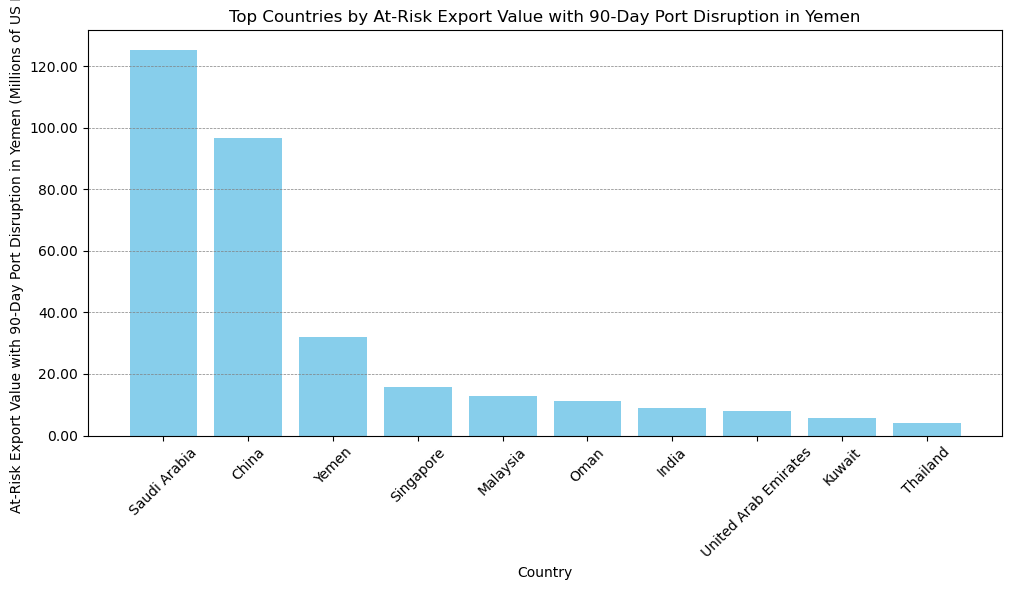

,from_country,daily_export_value_at_risk,daily_import_value_at_risk,at_risk_daily_export_value_90x
73,Saudi Arabia,1.392650e+06,1.382254e+07,1.253385e+08
13,China,1.073514e+06,6.136940e+06,9.661629e+07
100,Yemen,3.543018e+05,1.353540e+07,3.188716e+07
75,Singapore,1.765200e+05,4.802792e+06,1.588680e+07
52,Malaysia,1.427114e+05,1.464506e+06,1.284402e+07
62,Oman,1.243433e+05,1.370501e+06,1.119089e+07
34,India,9.906518e+04,1.832184e+06,8.915866e+06
94,United Arab Emirates,8.772177e+04,1.964594e+06,7.894959e+06
46,Kuwait,6.466021e+04,4.853408e+04,5.819419e+06
86,Thailand,4.703336e+04,5.448601e+05,4.233002e+06


In [8]:
# Create bar chart with y-axis showing "millions" and gray grid lines
plt.figure(figsize=(10, 6))
plt.bar(top_ten_exporters['from_country'], top_ten_exporters['at_risk_daily_export_value_90x'] / 1e6, color='skyblue')
plt.title('Top Countries by At-Risk Export Value with 90-Day Port Disruption in Yemen')
plt.xlabel('Country')
plt.ylabel('At-Risk Export Value with 90-Day Port Disruption in Yemen (Millions of US Dollars')
plt.xticks(rotation=45)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Adjust the y-axis labels to reflect the new scale in millions
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.2f}".format(x)))

# Display the adjusted plot
plt.savefig('images/value.png')
plt.show()

# Show the new table for top ten countries
top_ten_exporters


#### Identify Top Ten Countries in Terms of Impacted Percentage of Total Exports by a Port Disruption

In [9]:
# Calculate total export value for each country to all destinations
total_export_to_all_countries = data_df[data_df['industry'] == 'Total'].groupby('from_country')['daily_export_value_at_risk'].sum().reset_index()
total_export_to_all_countries.rename(columns={'daily_export_value_at_risk': 'total_export_value_to_all'}, inplace=True)

# Merge this with the top_ten_exporters DataFrame
top_ten_exporters_with_total = pd.merge(top_ten_exporters, total_export_to_all_countries, on='from_country', how='left')

# Calculate percent of total export value to selected country out of total export value to all countries
top_ten_exporters_with_total['portion_of_total_export_to_Country'] = (top_ten_exporters_with_total['daily_export_value_at_risk'] / top_ten_exporters_with_total['total_export_value_to_all'])

# Sort the DataFrame by 'portion_of_total_export_to_Country' in descending order
sorted_by_portion_to_yemen = top_ten_exporters_with_total.sort_values(by='portion_of_total_export_to_Country', ascending=False)

# Select the top ten countries based on the largest 'portion_of_total_export_to_Country'
top_ten_countries_by_portion_to_country = sorted_by_portion_to_yemen.head(10)

# Now, 'top_ten_countries_by_portion_to_yemen' contains the top ten countries in terms of portion of total export to Yemen.
top_ten_countries_by_portion_to_country

,from_country,daily_export_value_at_risk,daily_import_value_at_risk,at_risk_daily_export_value_90x,total_export_value_to_all,portion_of_total_export_to_Country
2,Yemen,3.543018e+05,1.353540e+07,3.188716e+07,3.387392e+07,0.010459
0,Saudi Arabia,1.392650e+06,1.382254e+07,1.253385e+08,1.310762e+09,0.001062
5,Oman,1.243433e+05,1.370501e+06,1.119089e+07,1.819159e+08,0.000684
8,Kuwait,6.466021e+04,4.853408e+04,5.819419e+06,1.235327e+08,0.000523
1,China,1.073514e+06,6.136940e+06,9.661629e+07,9.855455e+09,0.000109
4,Malaysia,1.427114e+05,1.464506e+06,1.284402e+07,1.569800e+09,0.000091
6,India,9.906518e+04,1.832184e+06,8.915866e+06,1.380379e+09,0.000072
7,United Arab Emirates,8.772177e+04,1.964594e+06,7.894959e+06,1.328998e+09,0.000066
9,Thailand,4.703336e+04,5.448601e+05,4.233002e+06,8.547186e+08,0.000055
3,Singapore,1.765200e+05,4.802792e+06,1.588680e+07,4.315688e+09,0.000041


#### Generate Bar Chart
##### Aggregated by Country, Export Value at Risk due to Disruption of Any Port in a Selected Country (Percent of Total Export Value)

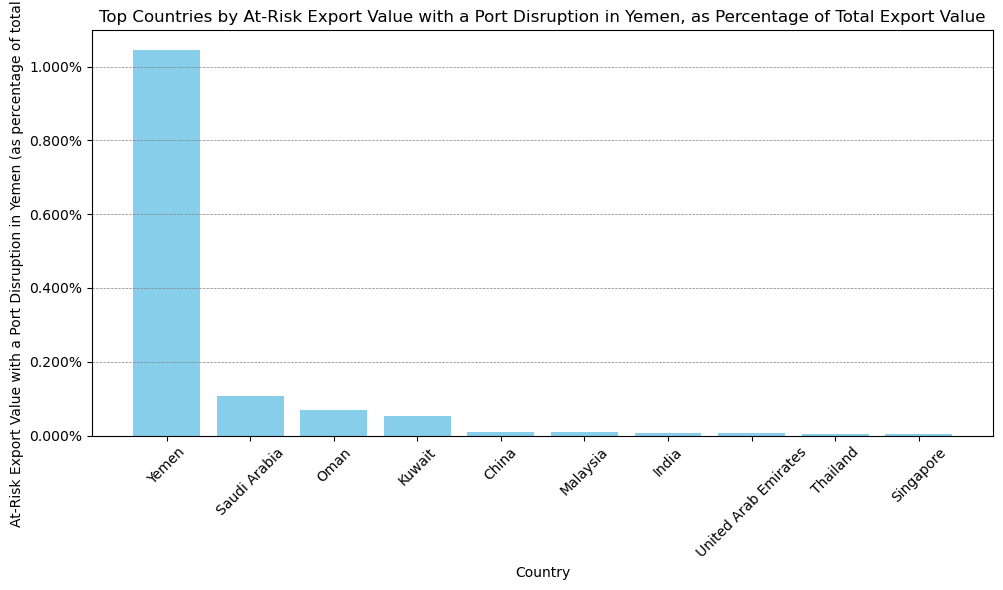

In [10]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

plt.figure(figsize=(10, 6))
plt.bar(top_ten_countries_by_portion_to_country['from_country'], top_ten_countries_by_portion_to_country['portion_of_total_export_to_Country'], color='skyblue')
plt.title('Top Countries by At-Risk Export Value with a Port Disruption in Yemen, as Percentage of Total Export Value')
plt.xlabel('Country')
plt.ylabel('At-Risk Export Value with a Port Disruption in Yemen (as percentage of total exports)')
plt.xticks(rotation=45)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Adjust the y-axis labels to reflect percentages with 3 decimal places
plt.gca().yaxis.set_major_formatter(PercentFormatter(1, 3))

# Display the adjusted plot
plt.savefig('images/value-percent.png')
plt.show()